In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from scipy.stats import norm

__Import des données dans le dataframe "df" et paramétrage des options__

In [15]:
df = pd.read_csv("kc_house_data.preparation.csv")
pd.options.display.max_columns = 100
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Conversion des dates__

In [16]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


__Conversion des pied² vers m²__

In [17]:
df["m2_habitable"] = round(df["m2_habitable"].apply(lambda x: x * 0.09290304))
df["m2_parcelle"] = round(df["m2_parcelle"].apply(lambda x: x * 0.09290304))
df["m2_etage"] = round(df["m2_etage"].apply(lambda x: x * 0.09290304))
df["m2_cave"] = round(df["m2_cave"].apply(lambda x: x * 0.09290304))
df["m2_habitable15"] = round(df["m2_habitable15"].apply(lambda x: x * 0.09290304))
df["m2_parcelle15"] = round(df["m2_parcelle15"].apply(lambda x: x * 0.09290304))
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,2014-10-13,221900.0,3,1.00,110.0,525.0,1.0,0,0,3,7,110.0,0.0,1955,0,98178,47.5112,-122.257,124.0,525.0
1,6414100192,2014-12-09,538000.0,3,2.25,239.0,673.0,2.0,0,0,3,7,202.0,37.0,1951,1991,98125,47.7210,-122.319,157.0,710.0
2,5631500400,2015-02-25,180000.0,2,1.00,72.0,929.0,1.0,0,0,3,6,72.0,0.0,1933,0,98028,47.7379,-122.233,253.0,749.0
3,2487200875,2014-12-09,604000.0,4,3.00,182.0,465.0,1.0,0,0,5,7,98.0,85.0,1965,0,98136,47.5208,-122.393,126.0,465.0
4,1954400510,2015-02-18,510000.0,3,2.00,156.0,751.0,1.0,0,0,3,8,156.0,0.0,1987,0,98074,47.6168,-122.045,167.0,697.0


In [18]:
df.describe()

,id,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402029e+05,3.371811,2.115826,193.266935,1402.784970,1.494096,0.007547,0.234292,3.409825,7.657915,166.162430,27.100755,1970.999676,84.464787,98077.951845,47.560093,-122.213982,184.564708,1185.291661
std,2.876736e+09,3.671337e+05,0.904096,0.768984,85.297599,3847.356808,0.539683,0.086549,0.766390,0.650546,1.173200,76.907487,41.121096,29.375234,401.821438,53.513072,0.138552,0.140724,63.663646,2533.875314
min,1.000102e+06,7.800000e+04,1.000000,0.500000,34.000000,48.000000,1.000000,0.000000,0.000000,1.000000,3.000000,34.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,37.000000,60.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,133.000000,468.000000,1.000000,0.000000,0.000000,3.000000,7.000000,111.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,138.000000,474.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,177.000000,708.000000,1.500000,0.000000,0.000000,3.000000,7.000000,145.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,171.000000,708.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,237.000000,993.000000,2.000000,0.000000,0.000000,4.000000,8.000000,205.000000,52.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,219.000000,937.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,1258.000000,153416.000000,3.500000,1.000000,4.000000,5.000000,13.000000,874.000000,448.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,577.000000,80937.000000


__Passage des valeurs 0 de la colonne annee_renovation par la valeur de annee_construction__

In [19]:
df.loc[df["annee_renovation"] == 0, "annee_renovation"] = df["annee_construction"]
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,cp,lat,lon,m2_habitable15,m2_parcelle15
0,7129300520,2014-10-13,221900.0,3,1.00,110.0,525.0,1.0,0,0,3,7,110.0,0.0,1955,1955,98178,47.5112,-122.257,124.0,525.0
1,6414100192,2014-12-09,538000.0,3,2.25,239.0,673.0,2.0,0,0,3,7,202.0,37.0,1951,1991,98125,47.7210,-122.319,157.0,710.0
2,5631500400,2015-02-25,180000.0,2,1.00,72.0,929.0,1.0,0,0,3,6,72.0,0.0,1933,1933,98028,47.7379,-122.233,253.0,749.0
3,2487200875,2014-12-09,604000.0,4,3.00,182.0,465.0,1.0,0,0,5,7,98.0,85.0,1965,1965,98136,47.5208,-122.393,126.0,465.0
4,1954400510,2015-02-18,510000.0,3,2.00,156.0,751.0,1.0,0,0,3,8,156.0,0.0,1987,1987,98074,47.6168,-122.045,167.0,697.0


__Graphique des corrélations entre les différents éléments__

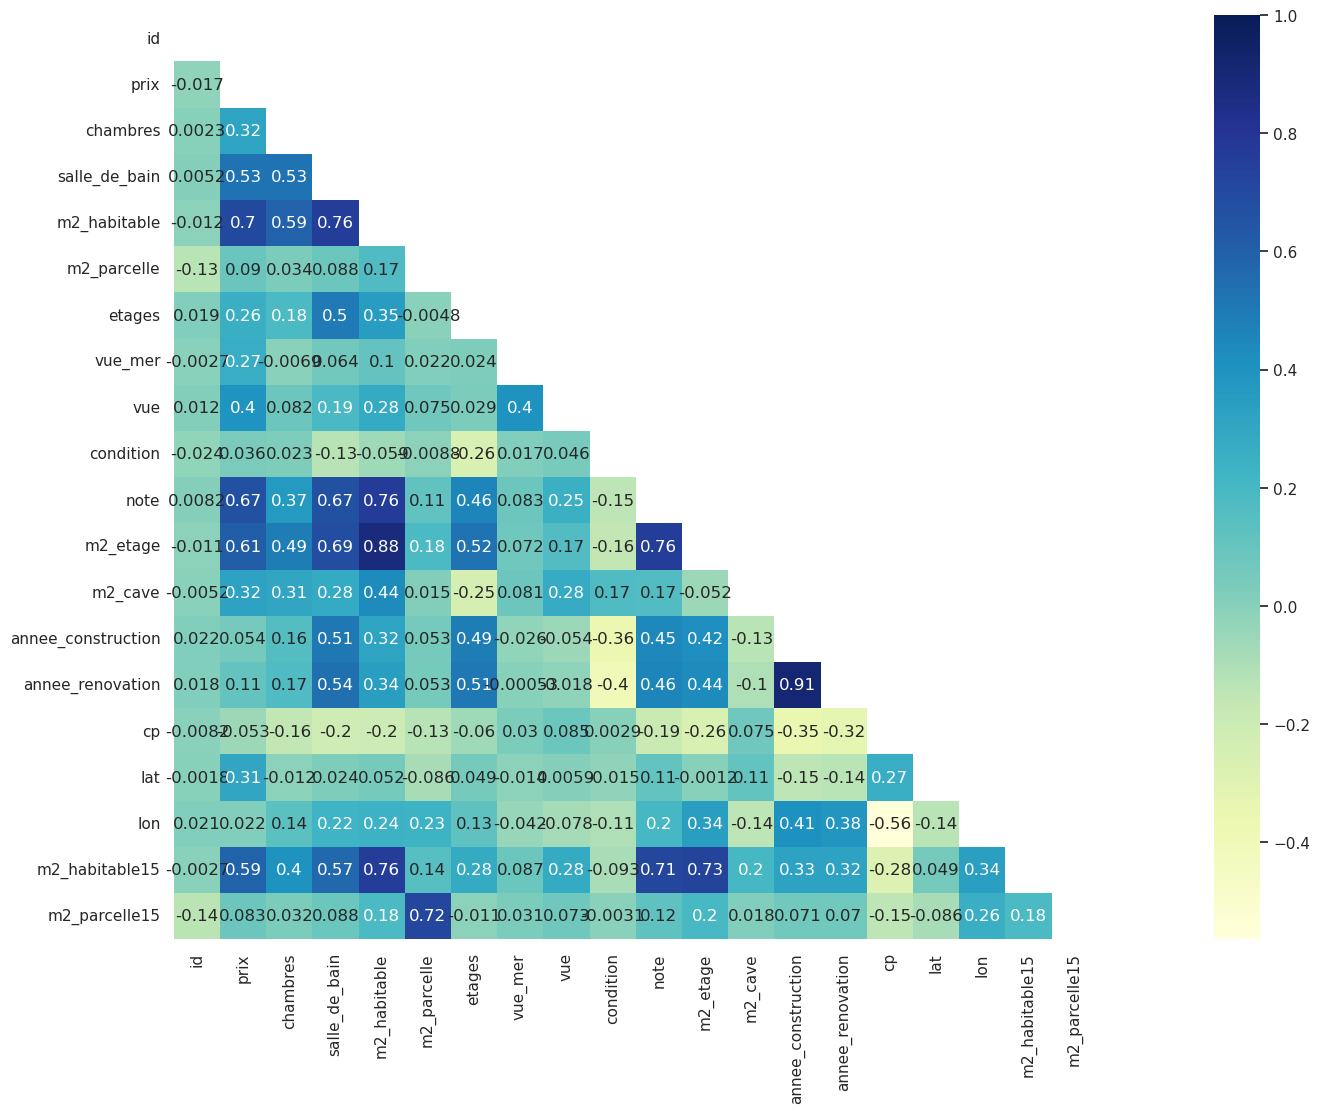

In [20]:
#Recherche des corrélations via la méthode pearson
pearson = df.corr(method='pearson')

#Création de la heatmap
sns.set(rc={'figure.figsize':(30,12)})
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(data=pearson, cmap="YlGnBu", mask=mask, vmax=1, annot=True, square=True)

__Création de colonnes pour chaque code postal différent et drop de l'ancienne colonne "cp"__

In [21]:
df = df.join(pd.get_dummies(df["cp"]))
df.drop("cp", axis=1, inplace=True)
df.head()

,id,date,prix,chambres,salle_de_bain,m2_habitable,m2_parcelle,etages,vue_mer,vue,condition,note,m2_etage,m2_cave,annee_construction,annee_renovation,lat,lon,m2_habitable15,m2_parcelle15,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,221900.0,3,1.00,110.0,525.0,1.0,0,0,3,7,110.0,0.0,1955,1955,47.5112,-122.257,124.0,525.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,239.0,673.0,2.0,0,0,3,7,202.0,37.0,1951,1991,47.7210,-122.319,157.0,710.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,72.0,929.0,1.0,0,0,3,6,72.0,0.0,1933,1933,47.7379,-122.233,253.0,749.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,182.0,465.0,1.0,0,0,5,7,98.0,85.0,1965,1965,47.5208,-122.393,126.0,465.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,156.0,751.0,1.0,0,0,3,8,156.0,0.0,1987,1987,47.6168,-122.045,167.0,697.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


__Graphique : Prix - M2 Parcelle__

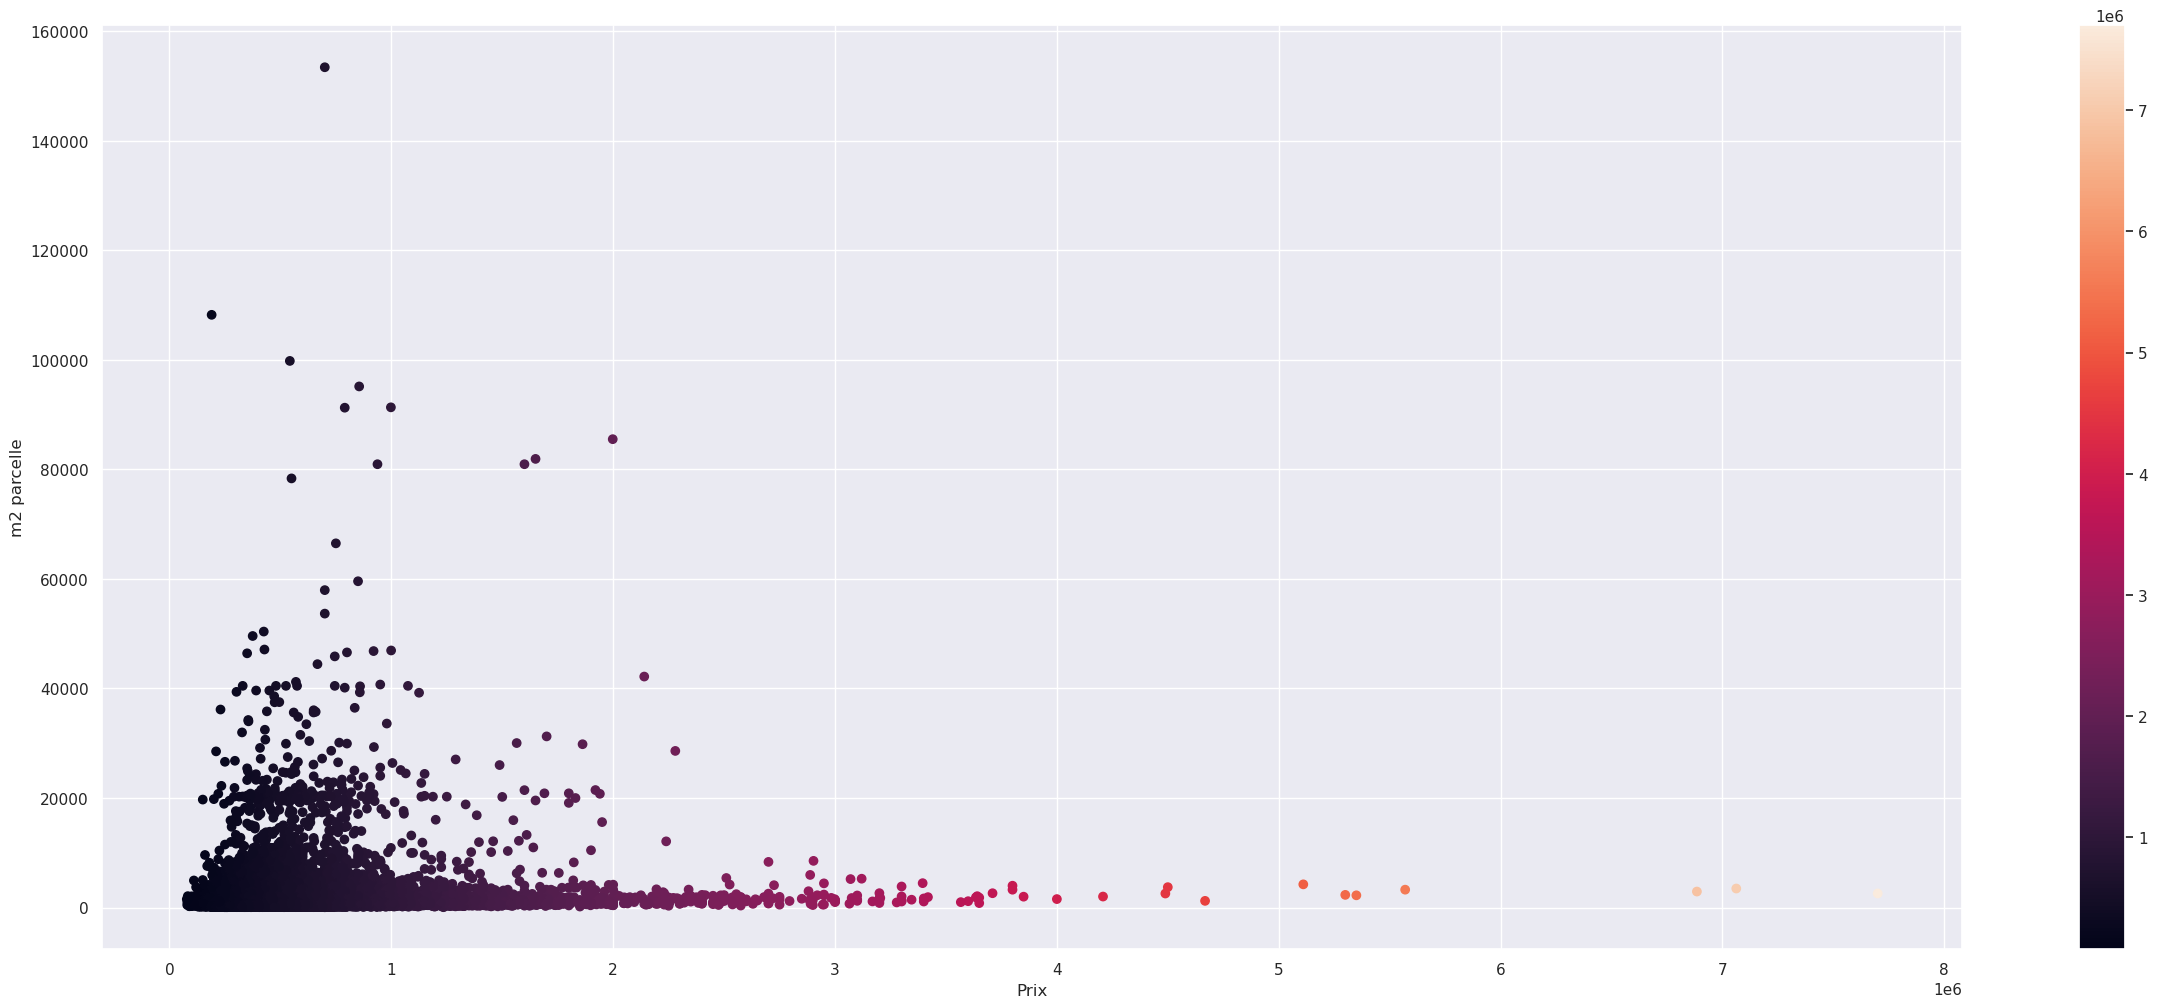

In [22]:
plt.scatter(df["prix"], df["m2_parcelle"], c=df["prix"])
plt.xlabel("Prix")
plt.ylabel("m2 parcelle")
plt.colorbar()

__Graphique : Prix - M2 Habitable__

<AxesSubplot:xlabel='prix', ylabel='m2_habitable'>

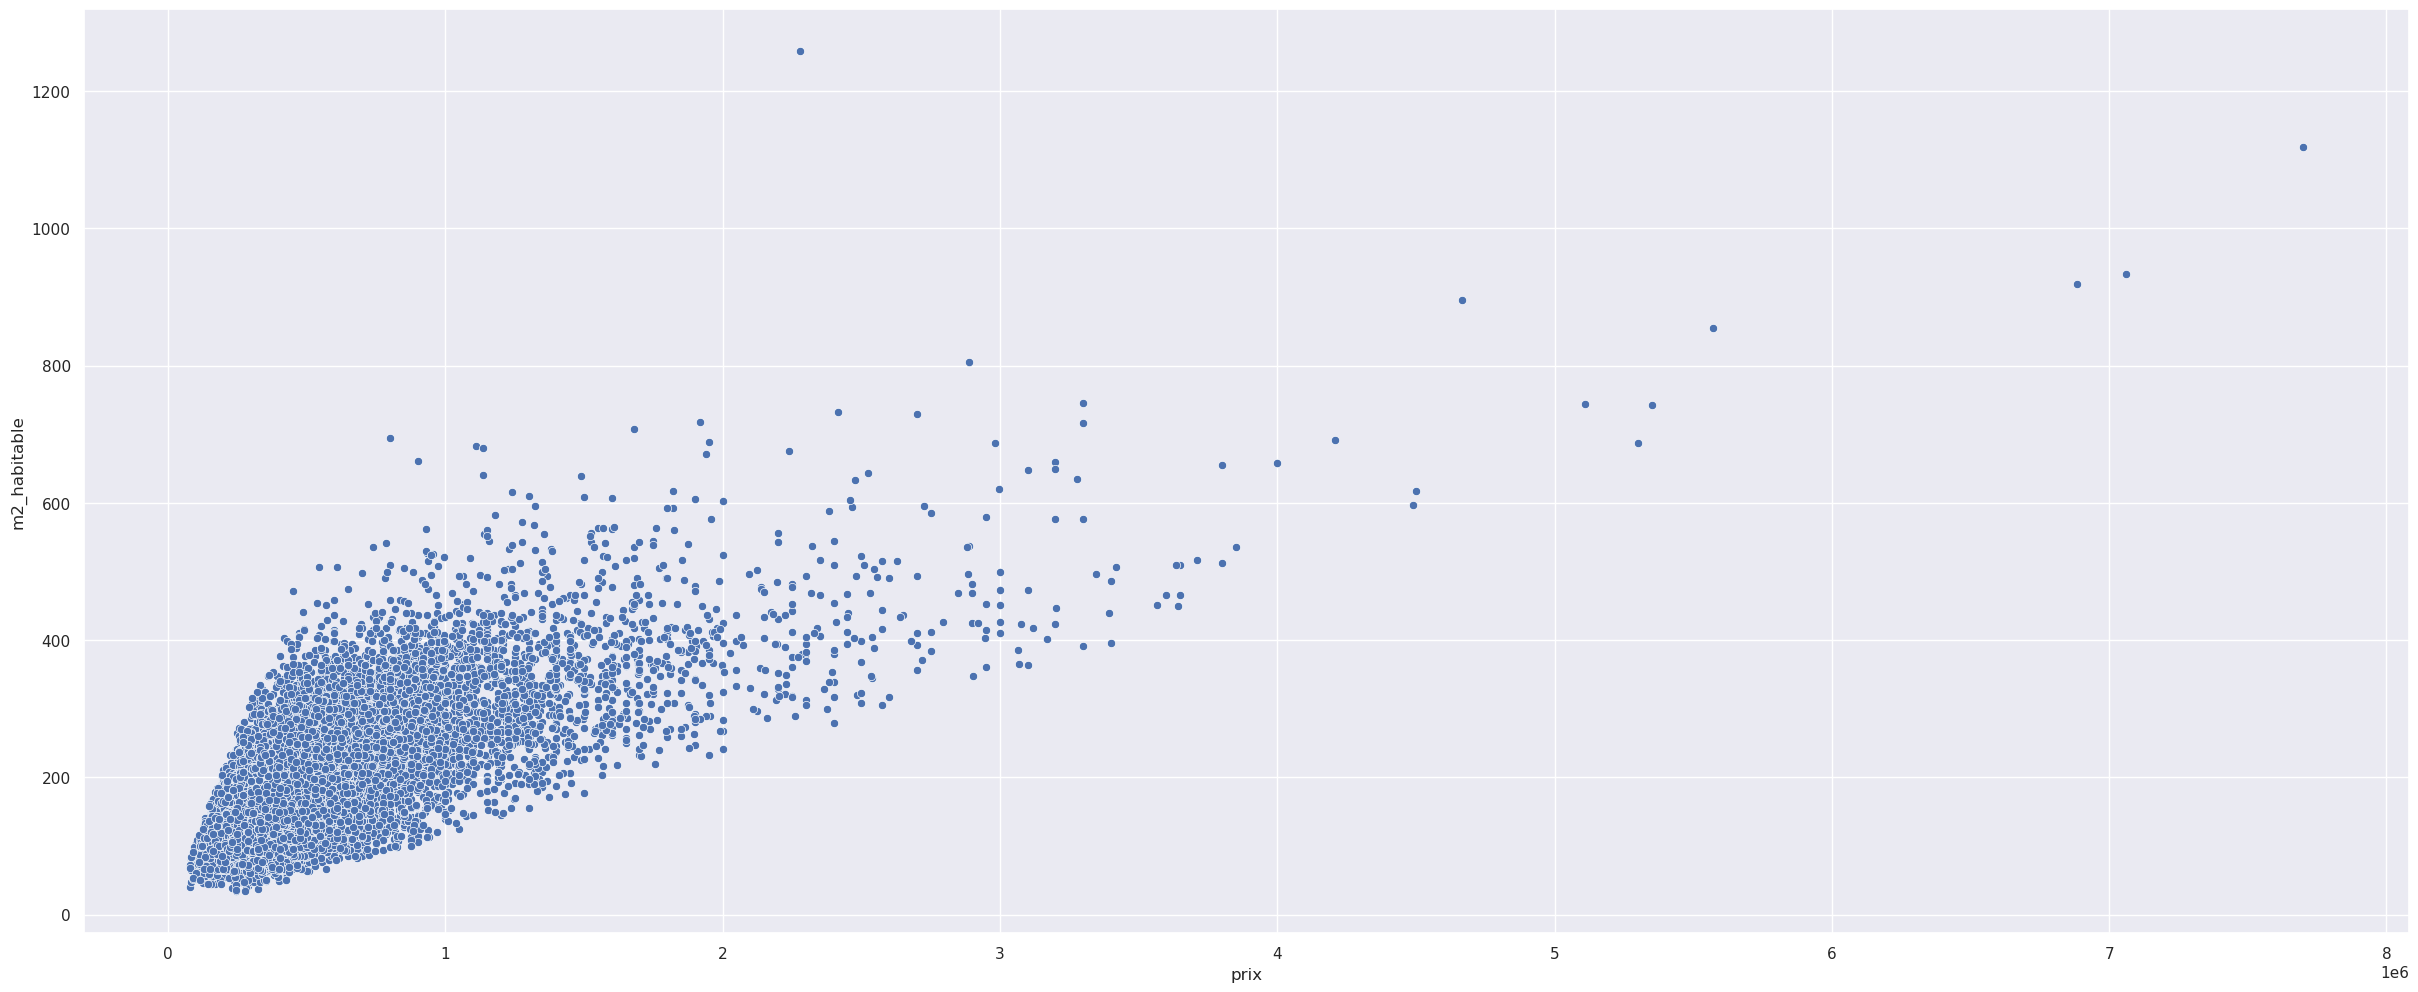

In [23]:
sns.scatterplot(data = df , x= "prix", y = "m2_habitable")

__Graphique : Prix - Année de construction__

<AxesSubplot:xlabel='annee_construction', ylabel='prix'>

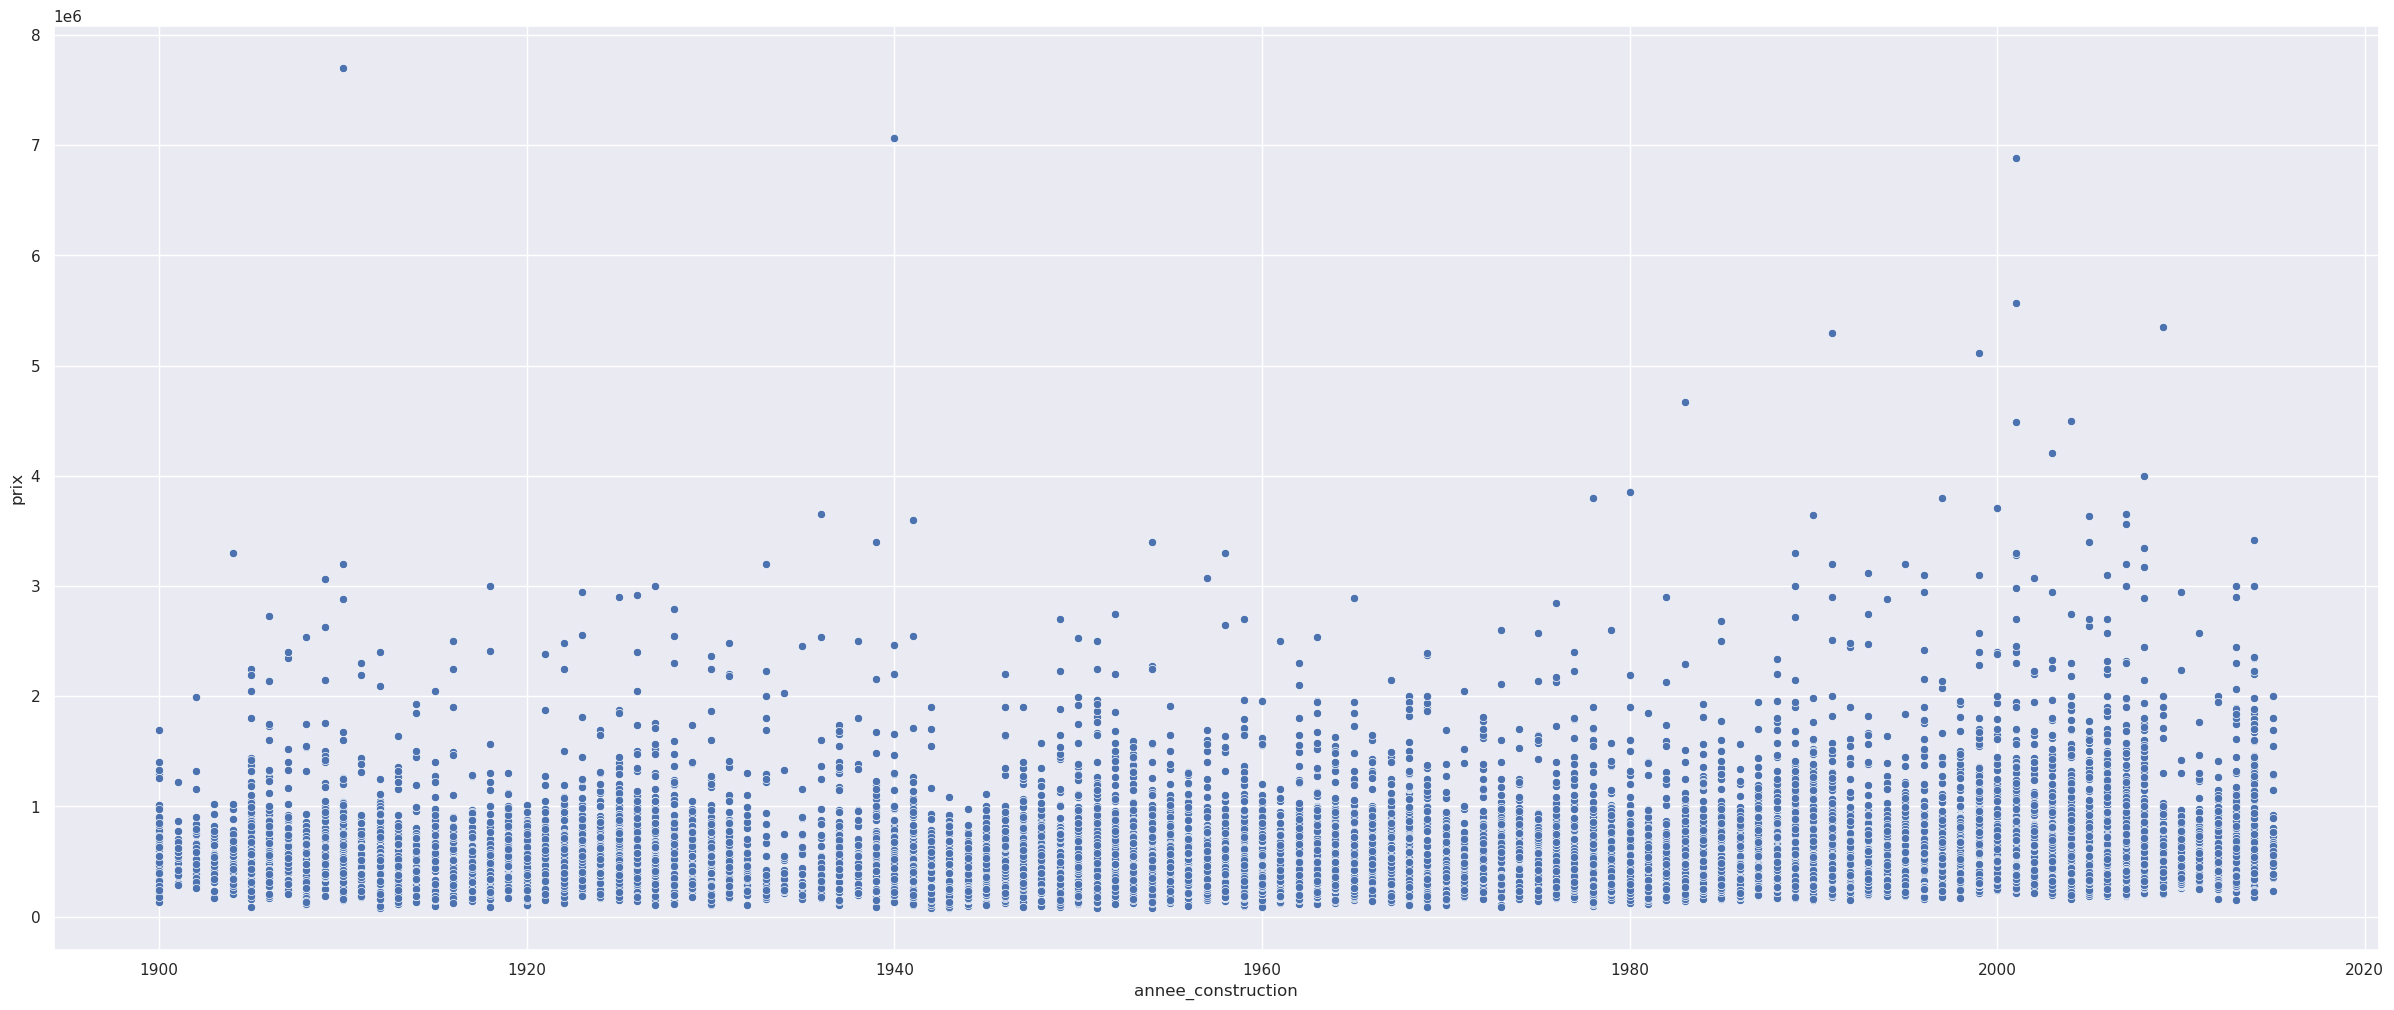

In [24]:
sns.scatterplot(data=df , x="annee_construction", y="prix")

__Graphique : Prix - Année de rénovation__

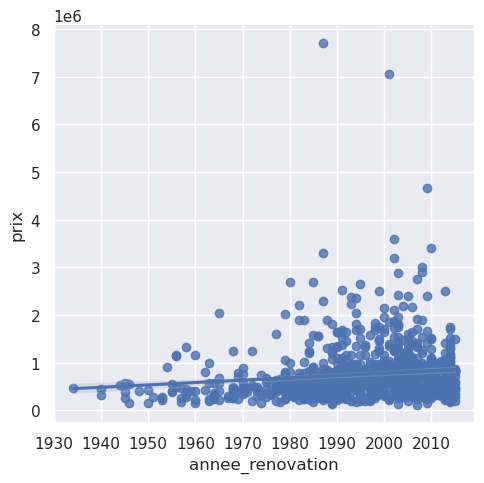

In [25]:
sns.lmplot(data=df[df["annee_renovation"] != df["annee_construction"]], x="annee_renovation", y="prix")

__Graphique de distribution du prix__

/tmp/ipykernel_7763/3937012643.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(df["prix"], bins=200, fit=norm)


[(50000.0, 1800000.0)]

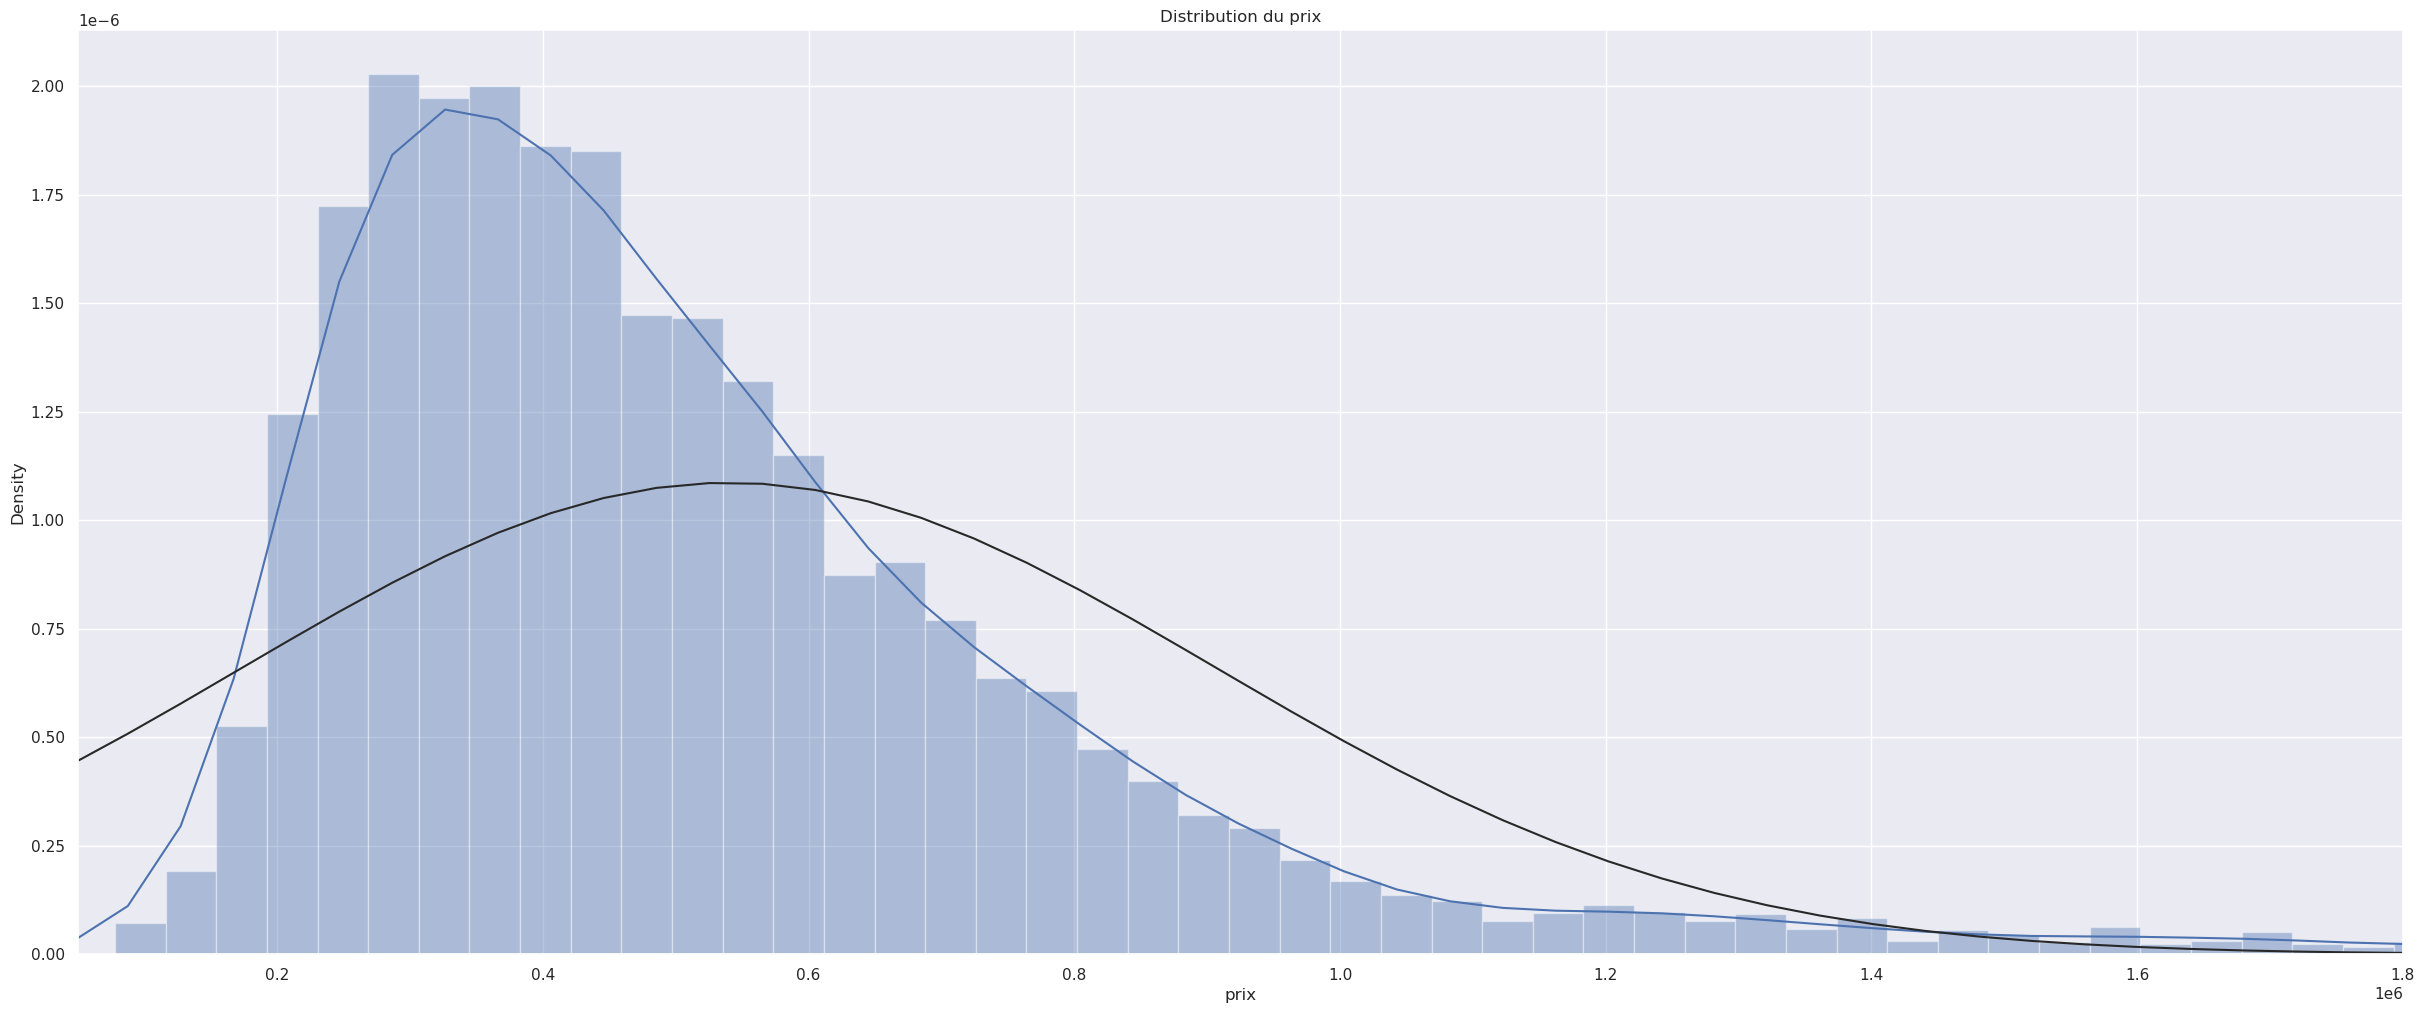

In [26]:
graph = sns.distplot(df["prix"], bins=200, fit=norm)
graph.set_title("Distribution du prix")
graph.set(xlim=(50000, 1800000))

__Distribution du prix des maisons par emplacement géographique__

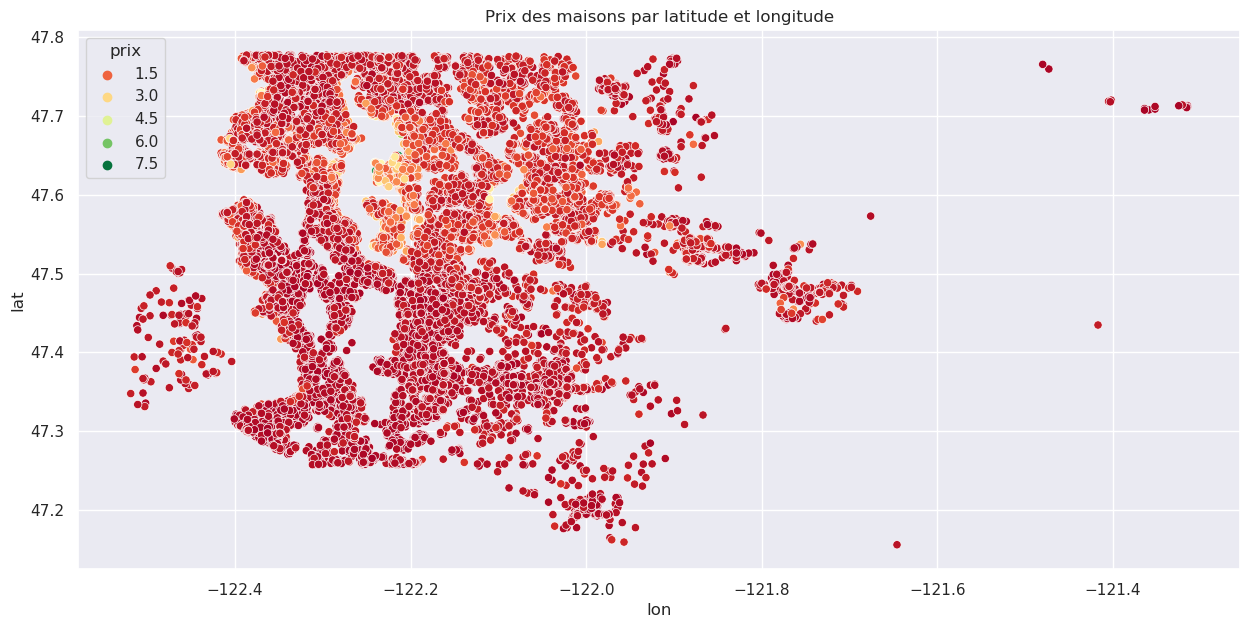

In [27]:
plt.figure(figsize= (15,7))
plt.title("Prix des maisons par latitude et longitude")
sns.scatterplot(data=df, x="lon", y="lat", hue="prix", palette="RdYlGn")
plt.show()

__Distribution du prix des maisons en dessous du quartile de 75% par emplacement géographique__

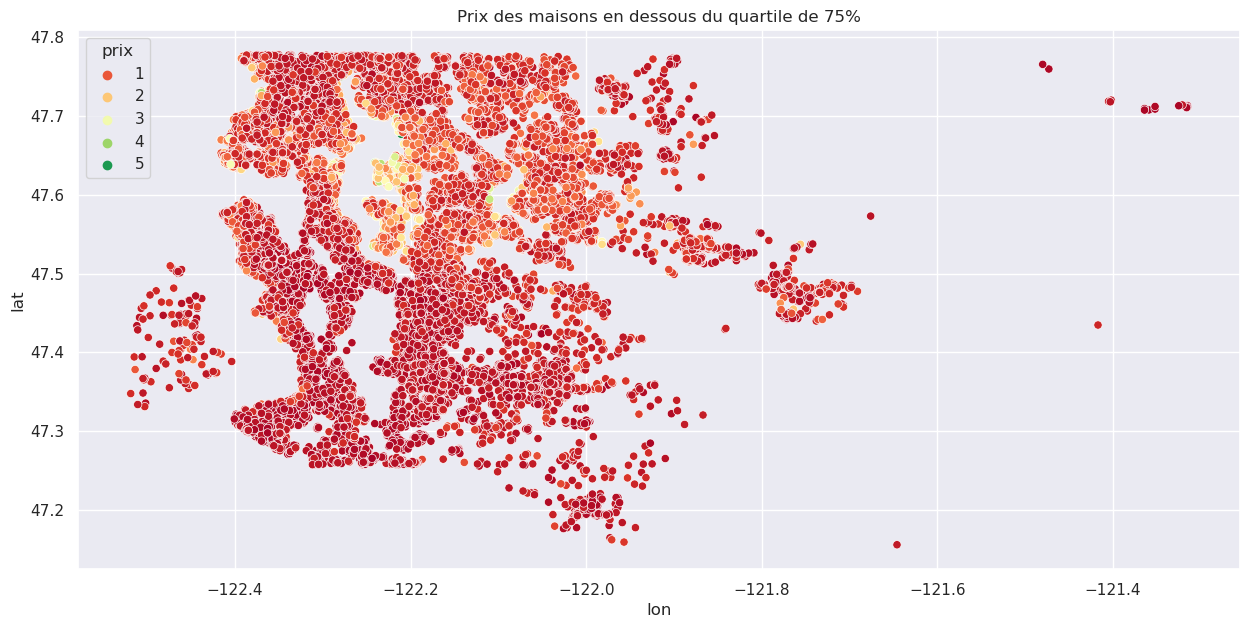

In [28]:
df_prix75 = df[df["prix"]<6450000]

plt.figure(figsize= (15,7))
plt.title("Prix des maisons en dessous du quartile de 75%")
sns.scatterplot(data=df_prix75, x="lon", y="lat", hue="prix", palette="RdYlGn")
plt.show()

__Impact de la vue sur la mer sur le prix__

<AxesSubplot:xlabel='vue_mer', ylabel='prix'>

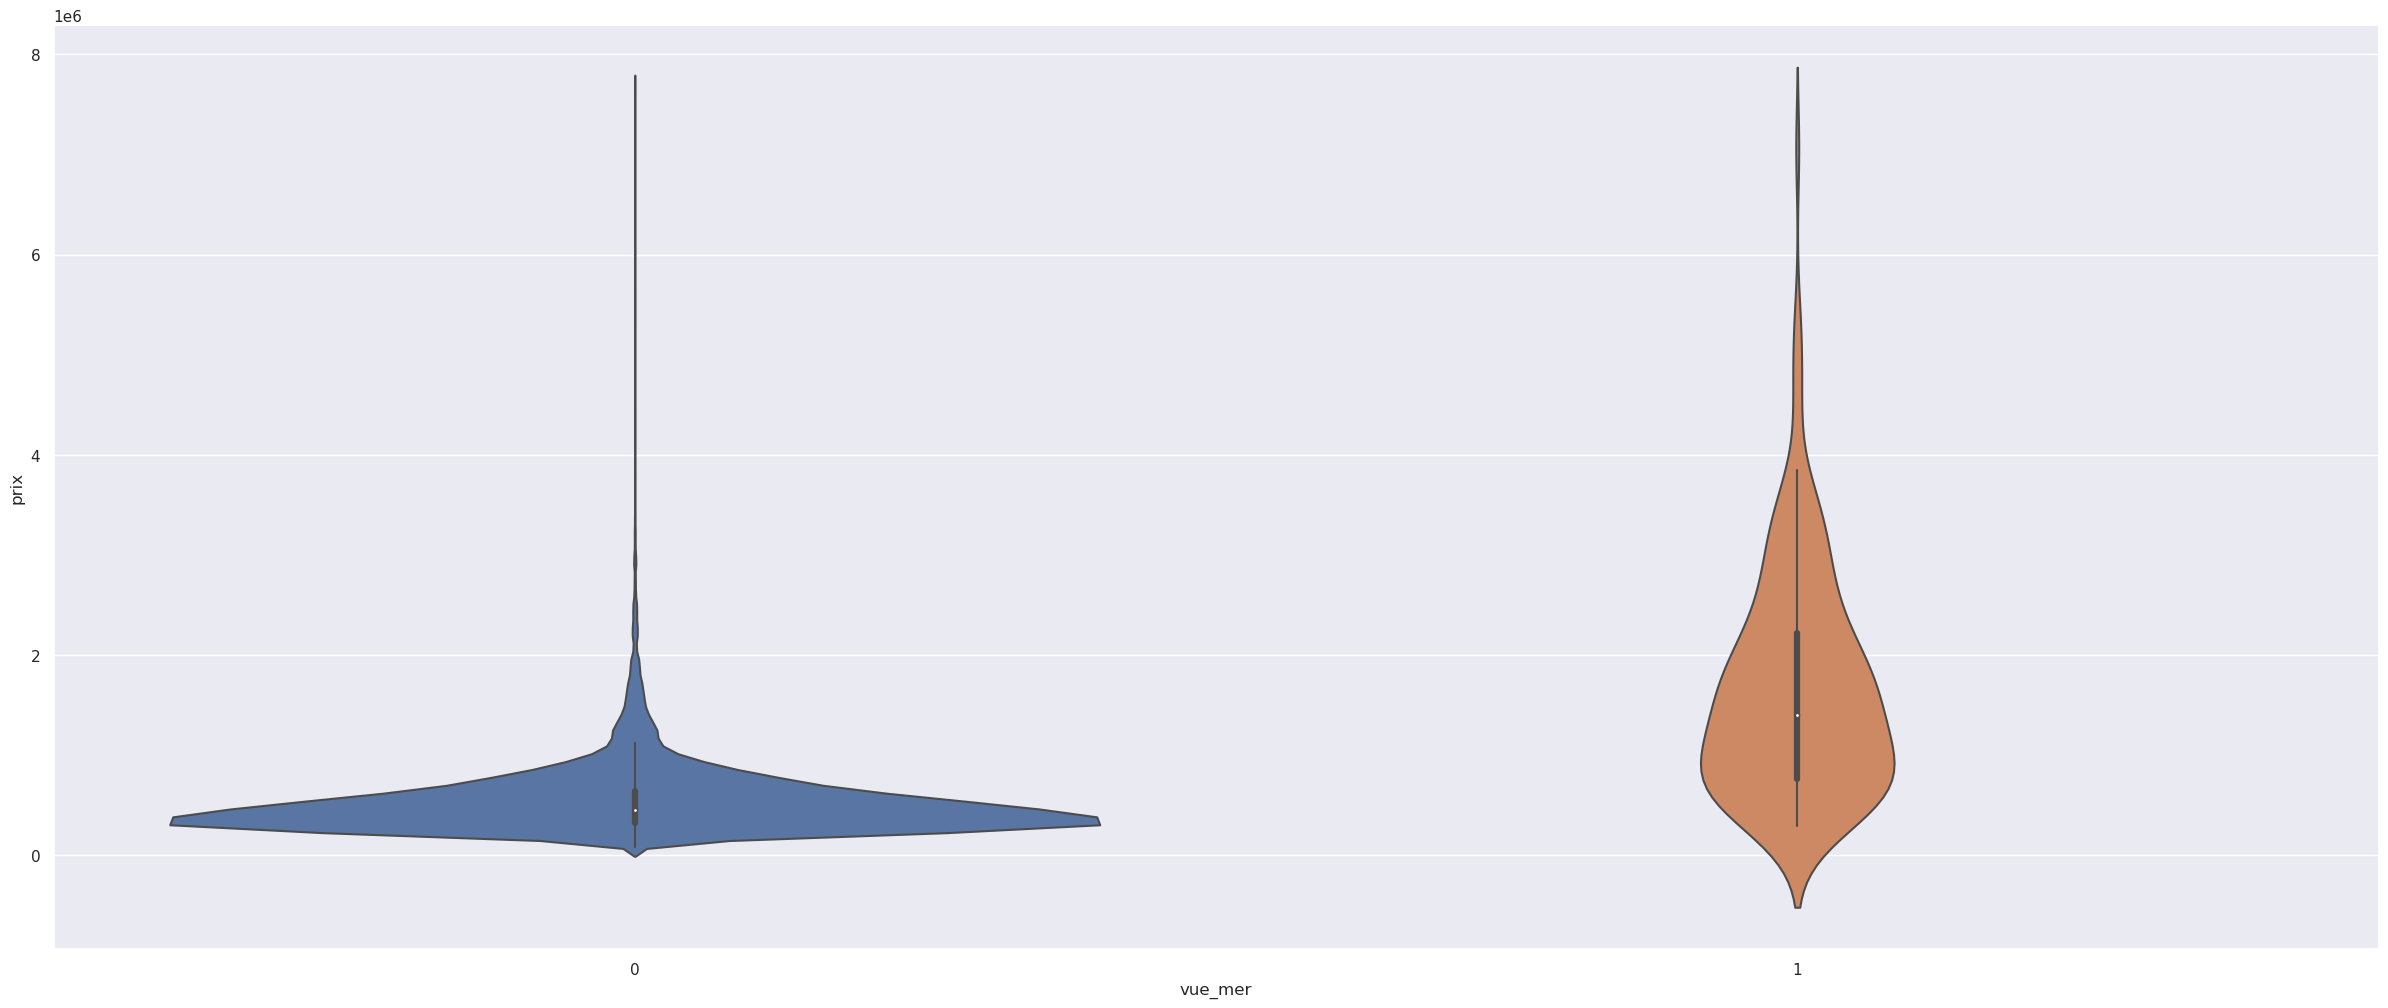

In [29]:
sns.violinplot(data=df , x="vue_mer", y="prix")

__Propension du nombre d'étages suivant les années de construction__

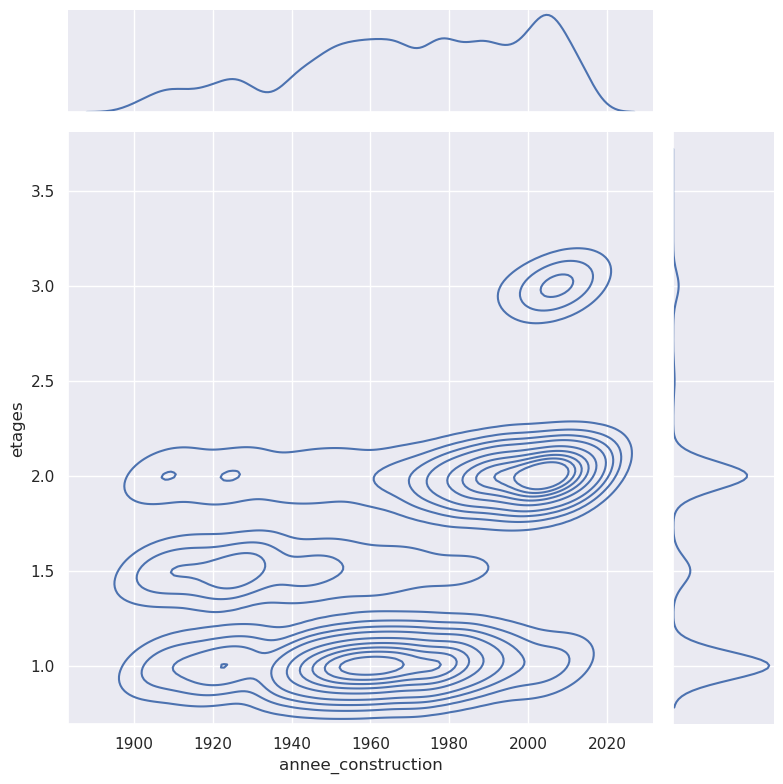

In [30]:
graph2 = sns.jointplot(data=df, x=df["annee_construction"], y=df["etages"], kind="kde", height=8)

__Propension du nombre de chambres suivant les années de construction__

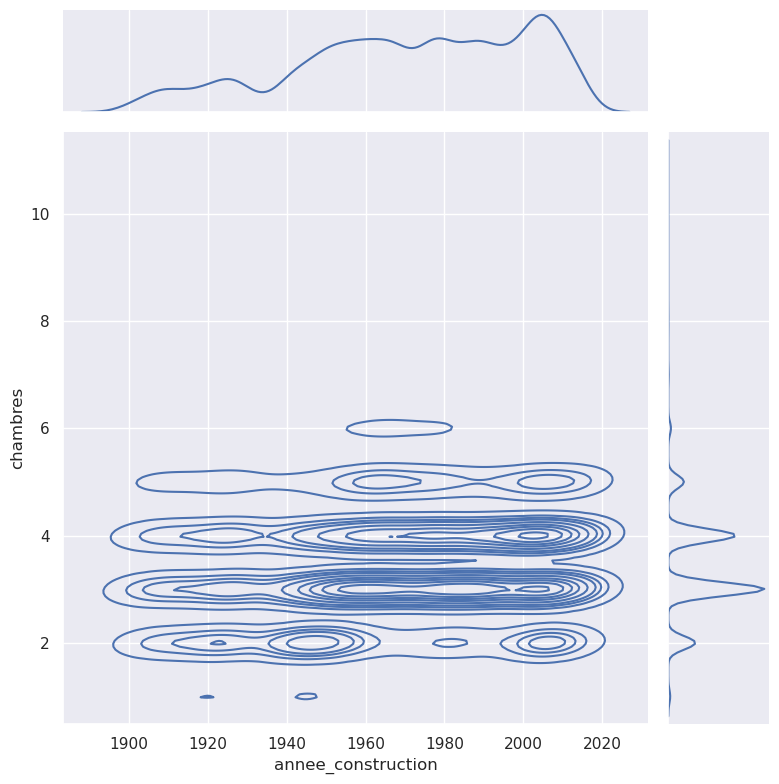

In [31]:
graph3 = sns.jointplot(data=df, x=df["annee_construction"], y=df["chambres"], kind="kde", height=8)

__Propension du nombre du nombre de salle de bain suivant les années de construction__

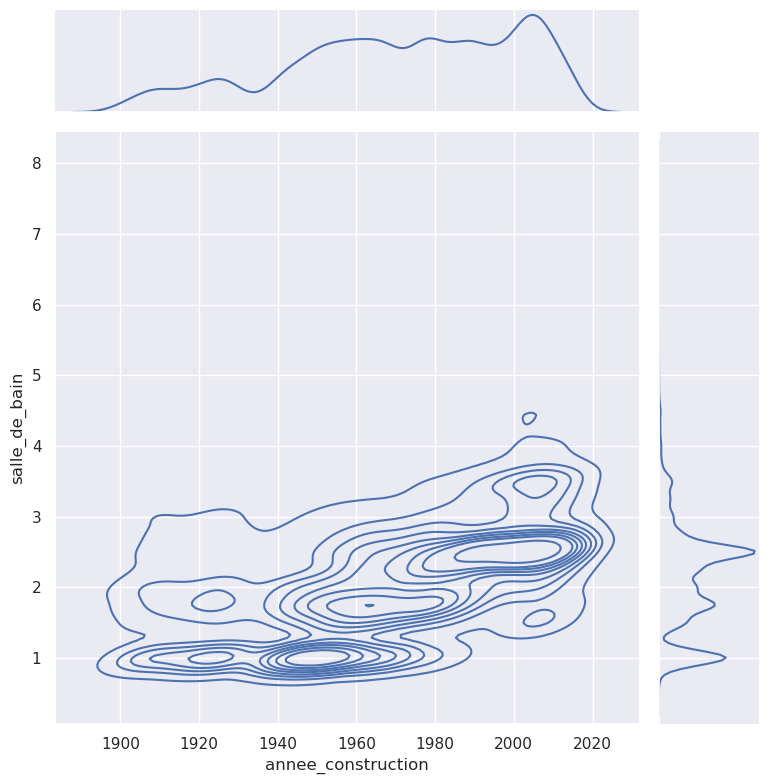

In [32]:
graph4 = sns.jointplot(data=df, x=df["annee_construction"], y=df["salle_de_bain"], kind="kde", height=8)

__Export csv pour la modélisation__

In [33]:
#df.to_csv("kc_house_data.modelisation.csv", index=False)